## A6.2 Exploring Relationships
### This script contains the following points:


#### 1. Import data libraries, additional setups, read csv
#### 2. Exploratory visual analysis and exporting charts
#### 3. Exploring Relationships
        - Create a correlation matrix heatmap (colored)
        - Create a scatterplot (or plots) for the variables with the strongest correlations
        - Create a pair plot of the entire data set
        - Create a categorical plot and interpret the result
#### 4. Hypotheses
---------------------------------------------------------------------------------------------------------------------------

### 1. Import data libraries, additional setups, read csv

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FuncFormatter

In [2]:
# Enables the rendering of Matplotlib plots directly within the notebook
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#  Create/save project folder path
path = r"Boat Sales Analysis"

# Read boat data (csv file)
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_sales_final.csv'), index_col = False)

# View dataframe
df

,Unnamed: 0,Boat Type,Manufacturer,Specifications,Year Built,Year Built Condition,Length,Length Condition,Width,Width Condition,Material,Price,Price Condition,Currency,Country,State_Region,Location,# of views last 7 days,Views Condition
0,0,Motor Yacht,Bayliner Power Boats,"Used Boat, Unleaded",1992.00,Old,7.70,Medium,2.46,Narrow,Plastic,14900,Low-value product,CHF,Switzerland,Le Landeron,NaN,3263,High Views
1,1,Hardtop,Princess Power Boats,"Used Boat, Diesel",1979.00,Old,11.12,Medium,3.88,Medium,GRP,35000,Low-value product,CHF,Switzerland,Neuenburgersee,Hauterive,2432,High Views
2,2,"Bowrider,Motor Yacht,Sport Boat",Windy Power Boats,"Used Boat, Diesel",2002.00,Mid,12.35,Medium,3.48,Medium,GRP,125900,Mid-value product,CHF,Switzerland,Lago Maggiore,6600 Locarno,2261,High Views
3,3,Hardtop,Pershing Power Boats,"Used Boat, Diesel",2009.00,Mid,20.30,Long,5.20,Wide,GRP,949000,High-value product,EUR,Germany,Baltic Sea,Neustadt In Holstein,2154,High Views
4,4,Sport Boat,Sea Ray Power Boats,"Used Boat, Unleaded",1993.00,Old,6.14,Short,2.34,Narrow,Plastic,19900,Low-value product,CHF,Switzerland,Murtensee,Avenches,2026,High Views
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9883,9883,Hardtop,Jeanneau Power Boats,"New Boat From Stock, Diesel",2018.00,New,10.36,Medium,3.05,Medium,PVC,229950,Mid-value product,GBP,United Kingdom,Lincoln,NaN,18,Low Views
9884,9884,Motor Yacht,NaN,"Used Boat, Diesel",2007.00,Mid,26.30,Long,6.35,Wide,GRP,1500000,High-value product,EUR,Italy,Mar Tirreno,NaN,18,Low Views
9885,9885,Center Console Boat,Bénéteau Power Boats,"New Boat From Stock, Unleaded",2020.00,New,6.41,Short,2.48,Narrow,PVC,62800,Mid-value product,EUR,France,La Grande Motte,NaN,18,Low Views
9886,9886,Center Console Boat,Bénéteau Power Boats,"New Boat From Stock, Unleaded",2020.00,New,6.41,Short,2.45,Narrow,PVC,53900,Mid-value product,EUR,France,Port Leucate,NaN,15,Low Views


In [4]:
# Drop redundant column
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
# Check for mixed types
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
    
    #Mixed data types found

Manufacturer
Specifications
Year Built Condition
Length Condition
Width Condition
Material
Country
State_Region
Location


In [6]:
df.dtypes

Boat Type                  object
Manufacturer               object
Specifications             object
Year Built                float64
Year Built Condition       object
Length                    float64
Length Condition           object
Width                     float64
Width Condition            object
Material                   object
Price                       int64
Price Condition            object
Currency                   object
Country                    object
State_Region               object
Location                   object
# of views last 7 days      int64
Views Condition            object
dtype: object

In [7]:
# Change mixed-data
df['Manufacturer'] = df['Manufacturer'].astype('str')
df['Specifications'] = df['Specifications'].astype('str')
df['Year Built Condition'] = df['Year Built Condition'].astype('str')
df['Length Condition'] = df['Length Condition'].astype('str')
df['Width Condition'] = df['Width Condition'].astype('str')
df['Material'] = df['Material'].astype('str')
df['Country'] = df['Country'].astype('str')
df['State_Region'] = df['State_Region'].astype('str')
df['Location'] = df['Location'].astype('str')

In [8]:
# Check for mixed types
for col in df.columns.tolist():
  weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col) # No mixed data types

------------------------------------------------------------------------------------------------------------------------
### 2. Exploratory visual analysis
##### distributions

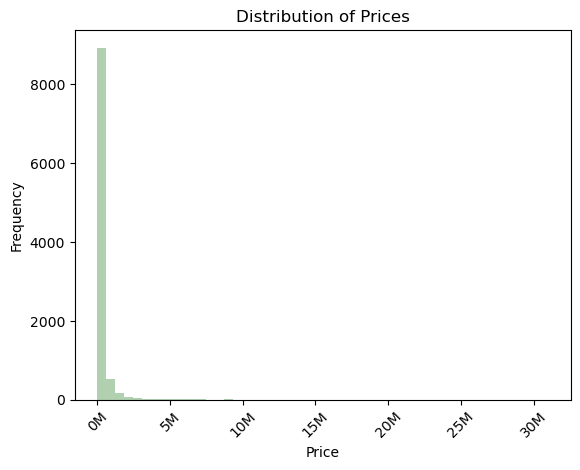

In [9]:
# Function to format y-axis labels in millions with 2 decimal places
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x / 1000000)

# Visualize the distribution of 'Price' with a histogram
dist_price = df['Price'].plot.hist(bins=50, color='darkseagreen', alpha=0.7)

# Use ScalarFormatter to disable scientific notation on the y-axis
dist_price.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Manually set y-axis tick labels as 2 decimal floats in millions
dist_price.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add a title and label for the x-axis
dist_price.set_title('Distribution of Prices')
dist_price.set_xlabel('Price')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Export bar chart
dist_price.figure.savefig(os.path.join(path, '03 Analysis','Visualizations', 'dist_price.png'), dpi=300, bbox_inches='tight')

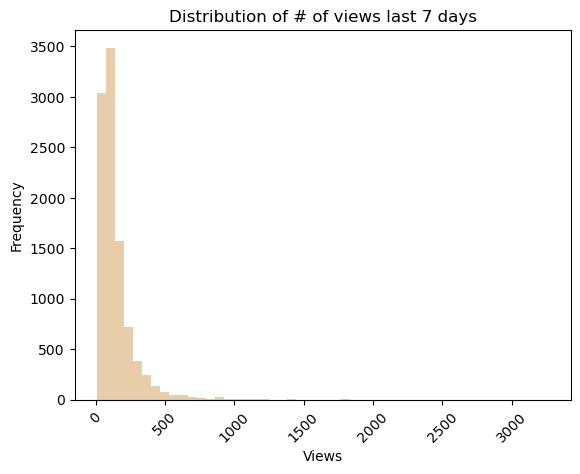

In [10]:
# Function to format y-axis labels in thousands with 2 decimal places
#def thousands_formatter(x, pos):
    #return '{:.0f}k'.format(x / 1000)

# Visualize the distribution of 'Number of views last 7 days' with a histogram
dist_views = df['# of views last 7 days'].plot.hist(bins=50, color='burlywood', alpha=0.7)

# Use ScalarFormatter to disable scientific notation on the x-axis
#dist_views.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Manually set x-axis tick labels as 2 decimal floats in thousands
#dist_views.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add a title and label for the x-axis
dist_views.set_title('Distribution of # of views last 7 days')
dist_views.set_xlabel('Views')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Export bar chart
dist_views.figure.savefig(os.path.join(path, '03 Analysis','Visualizations', 'dist_views.png'), dpi=300, bbox_inches='tight')

***notes:*** Right-skewed distribution for both distributions of yacht and boat website viewership by price and views.

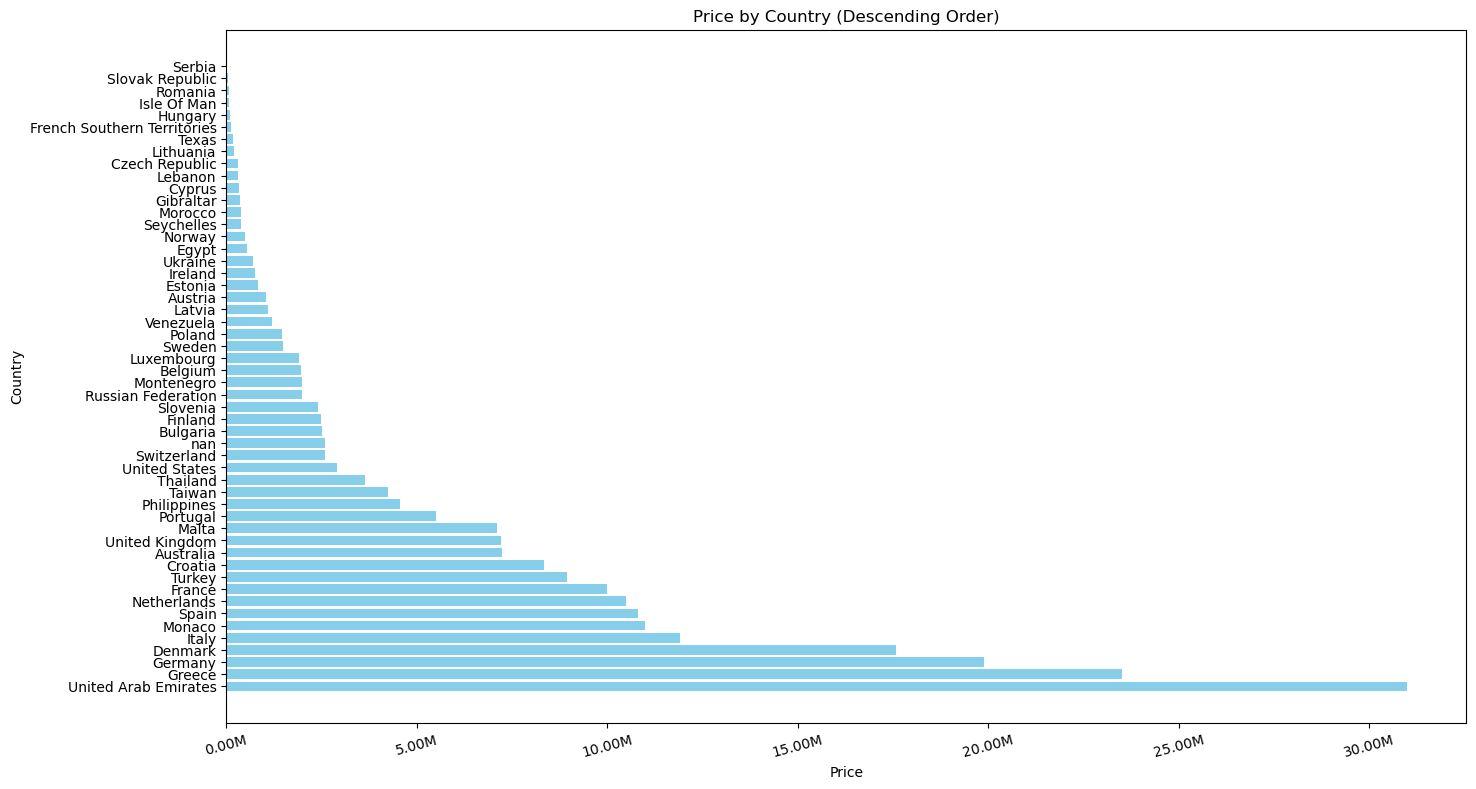

In [11]:
# Function to format y-axis labels in millions with 2 decimal places
def millions_formatter(x, pos):
    return '{:.2f}M'.format(x / 1000000)

# Convert 'Country' column to string if needed
df['Country'] = df['Country'].astype(str)

# Sort the DataFrame by 'Price' in descending order
df_sorted = df.sort_values(by='Price', ascending=False)

# Create a bar chart for 'Price' by 'Country'
plt.figure(figsize=(16, 9))
country_price_bar = plt.barh(df_sorted['Country'], df_sorted['Price'], color='skyblue')

# Use ScalarFormatter to disable scientific notation on the y-axis
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))

# Manually set x-axis tick labels as 2 decimal floats in millions
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Add a title and label for the axes
plt.title('Price by Country (Descending Order)')
plt.xlabel('Price')
plt.ylabel('Country')

# Rotate x-axis labels by 15 degrees for better readability
plt.xticks(rotation=15)

# Export bar chart
plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'country_price_bar.png'), dpi=300, bbox_inches='tight')

***notes:*** Top 5 Countries by their yacht and boat pricing are United Arab Emirates, Greece, German, Denmark, and Italy.

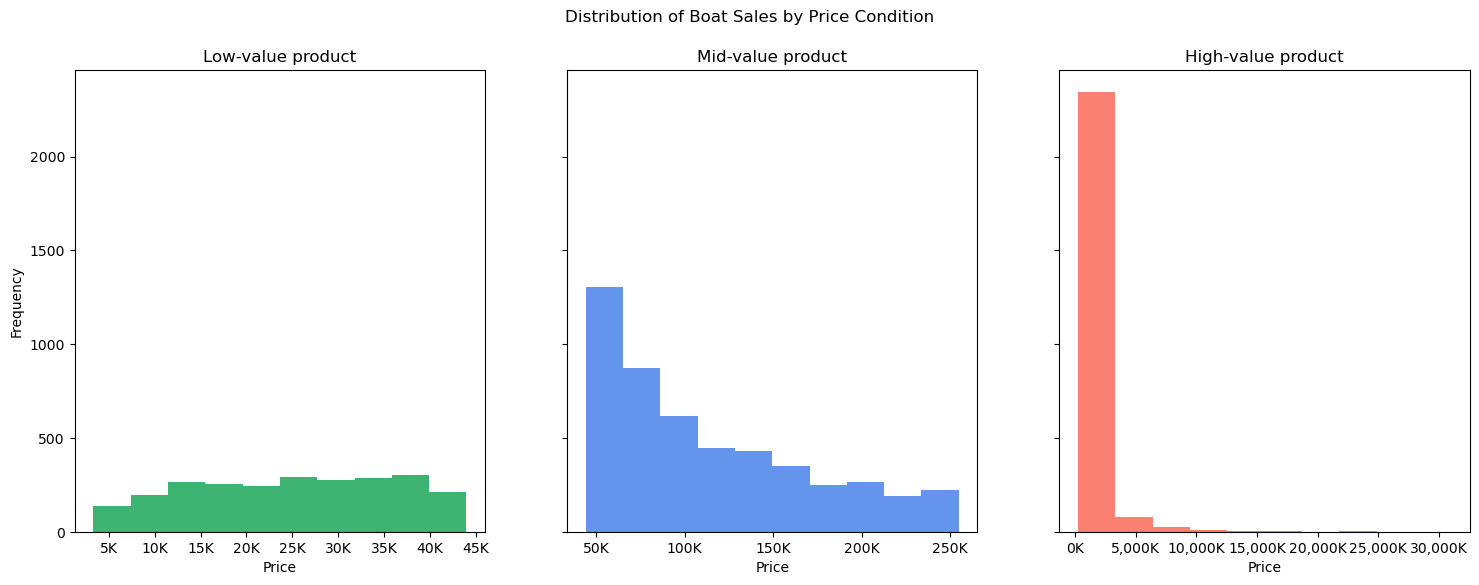

In [12]:
# Function to format x-axis labels in thousands without scientific notation
def thousands_formatter(x, pos):
    return '{:,.0f}K'.format(x / 1000)

# Choose CSS colors for each histogram
colors = ['mediumseagreen', 'cornflowerblue', 'salmon']

# Visualize the distribution of boat sales with histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
df['Price'][df['Price Condition'] == 'Low-value product'].plot(kind='hist', ax=axes[0], color=colors[0])
df['Price'][df['Price Condition'] == 'Mid-value product'].plot(kind='hist', ax=axes[1], color=colors[1])
df['Price'][df['Price Condition'] == 'High-value product'].plot(kind='hist', ax=axes[2], color=colors[2])

# Loop through the subplots and customize each
for i, ax in enumerate(axes):
    # Disable scientific notation on the x-axis
    ax.xaxis.get_major_formatter().set_scientific(False)
    # Set x-axis tick labels in thousands without decimal places
    ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    # Add x and y labels
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')
    # Add category title
    ax.set_title(df['Price Condition'].unique()[i])

# Add a common title for all subplots
fig.suptitle('Distribution of Boat Sales by Price Condition')

# Export bar chart
fig.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'dist_boat_sales_by_price_cond.png'), dpi=300, bbox_inches='tight')

***Low-value*** yacht or boat, Most Prices fall betwen the ***25-45k range (normal dist.)***

***Mid-value*** yacht or boat, Most prices fall within the ***50k range. (right-skewed dist.)***

***High-value*** yacht or boat, Most prices fall within the ***0-5M range. (right-skewed dist.)***

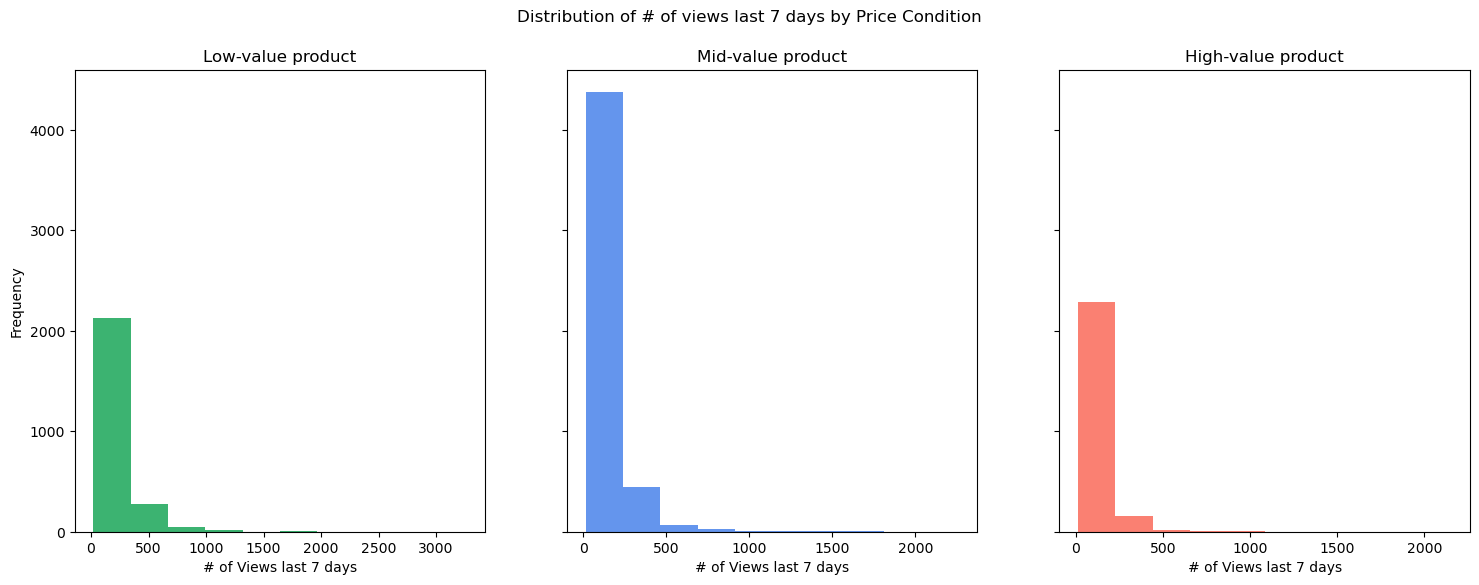

In [13]:
# Function to format x-axis labels in thousands without scientific notation
#def hundreds_formatter(x, pos):
    #return '{:,.0f}H'.format(x / 100)

# Choose CSS colors for each histogram
colors = ['mediumseagreen', 'cornflowerblue', 'salmon']

# Visualize the distribution of boat sales with histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
df['# of views last 7 days'][df['Price Condition'] == 'Low-value product'].plot(kind='hist', ax=axes[0], color=colors[0])
df['# of views last 7 days'][df['Price Condition'] == 'Mid-value product'].plot(kind='hist', ax=axes[1], color=colors[1])
df['# of views last 7 days'][df['Price Condition'] == 'High-value product'].plot(kind='hist', ax=axes[2], color=colors[2])

# Loop through the subplots and customize each
for i, ax in enumerate(axes):
    # Disable scientific notation on the x-axis
    #ax.xaxis.get_major_formatter().set_scientific(False)
    # Set x-axis tick labels in thousands without decimal places
    #ax.xaxis.set_major_formatter(FuncFormatter(hundreds_formatter))
    # Add x and y labels
    ax.set_xlabel('# of Views last 7 days')
    ax.set_ylabel('Frequency')
    # Add category title
    ax.set_title(df['Price Condition'].unique()[i])

# Add a common title for all subplots
fig.suptitle('Distribution of # of views last 7 days by Price Condition')

# Save the figure
fig.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'dist_num_of_views_by_price_cond.png'), bbox_inches='tight')

All plots have views that fall betwen the ***0-500 count range (right-skewed dist.)***

***Mid-value*** yacht or boat = most views within the data set.

---------------------------------------------------------------------------------------------------------------------------
### 3. Exploring Relationships

- ***Create a correlation matrix heatmap (colored)***

In [14]:
# Specifying the columns of interest (numeric)
num_cols = ['Year Built', 'Length', 'Width', 'Price', '# of views last 7 days']

# Create a subset DataFrame with selected columns
sub_df = df[num_cols]

In [15]:
# Create a correlation matrix
sub_df.corr()

,Year Built,Length,Width,Price,# of views last 7 days
Year Built,1.00,-0.20,-0.10,0.11,-0.11
Length,-0.20,1.00,0.87,0.54,-0.14
Width,-0.10,0.87,1.00,0.51,-0.16
Price,0.11,0.54,0.51,1.00,-0.01
# of views last 7 days,-0.11,-0.14,-0.16,-0.01,1.00


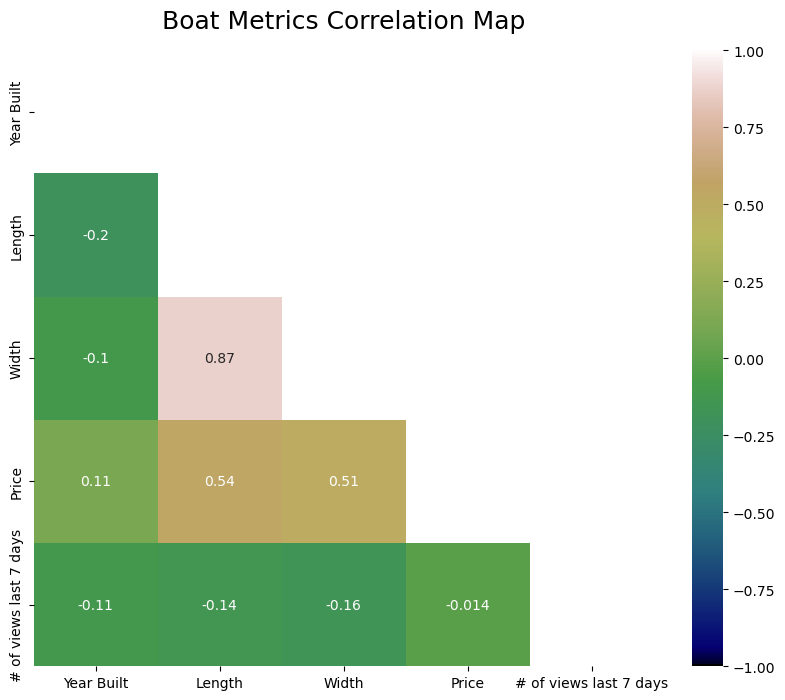

In [16]:
# Set fig size
plt.figure(figsize=(10, 8))

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(sub_df.corr(), dtype=bool)) # Isolate the upper triangle of a matrix

# Create a correlation matrix heatmap (colored)
boat_heatmap = sns.heatmap(sub_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='gist_earth')

#Set title
boat_heatmap.set_title('Boat Metrics Correlation Map', fontdict={'fontsize':18}, pad=16);

# Save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'boat_corr_heatmap.png'), dpi=300, bbox_inches='tight')

***notes:*** (Triangle Correlation Heatmap)
- 1 indicates a perfect positive correlation (as one variable increases, the other also increases proportionally).
- -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).
- 0 indicates no linear correlation.

Interpreting the given correlation matrix for the variables "Year Built," "Length," "Width," "Price," and "Number of Views Last 7 Days":

1. **Year Built and Length:**
   - The correlation coefficient between Year Built and Length is **-0.20.**
   - This suggests a **weak negative correlation** between the year a boat was built and its length. As the year built increases, the length tends to decrease slightly.

2. **Year Built and Width:**
   - The correlation coefficient between Year Built and Width is **-0.10.**
   - Similarly, there is a **weak negative correlation** between the year a boat was built and its width. As the year built increases, the width tends to decrease slightly.

3. **Year Built and Price:**
   - The correlation coefficient between Year Built and Price is **0.11.**
   - There is a **weak positive correlation** between the year a boat was built and its price. As the year built increases, the price tends to increase slightly.

4. **Year Built and Number of Views Last 7 Days:**
   - The correlation coefficient between Year Built and Number of Views Last 7 Days is **-0.11.**
   - A **weak negative correlation** exists between the year a boat was built and the number of views online in the last 7 days. As the year built increases, the number of views tends to decrease slightly.

5. **Length and Width:**
   - The correlation coefficient between Length and Width is **0.87.**
   - This indicates a **strong positive correlation** between boat length and width. As the length of the boat increases, the width tends to increase as well.

6. **Length and Price:**
   - The correlation coefficient between Length and Price is **0.54.**
   - There is a **moderate positive correlation** between boat length and price. As the length of the boat increases, the price tends to increase.

7. **Width and Price:**
   - The correlation coefficient between Width and Price is **0.51.**
   - Similar to length, there's a **moderate positive correlation** between boat width and price. As the width of the boat increases, the price tends to increase.

8. **Length and Number of Views Last 7 Days:**
   - The correlation coefficient between Length and Number of Views Last 7 Days is **-0.14.**
   - This indicates a **weak negative correlation** between boat length and the number of views online in the last 7 days. As the length of the boat increases, the number of views tends to decrease slightly.

9. **Width and Number of Views Last 7 Days:**
   - The correlation coefficient between Width and Number of Views Last 7 Days is **-0.16.**
   - Similar to length, there's a **weak negative correlation** between boat width and the number of views online in the last 7 days. As the width of the boat increases, the number of views tends to decrease slightly.

10. **Price and Number of Views Last 7 Days:**
    - The correlation coefficient between Price and Number of Views Last 7 Days is **-0.01.**
    - There is a **very weak negative correlation** between boat price and the number of views online in the last 7 days. The correlation is close to zero, suggesting that there is almost no linear relationship between these two variables.

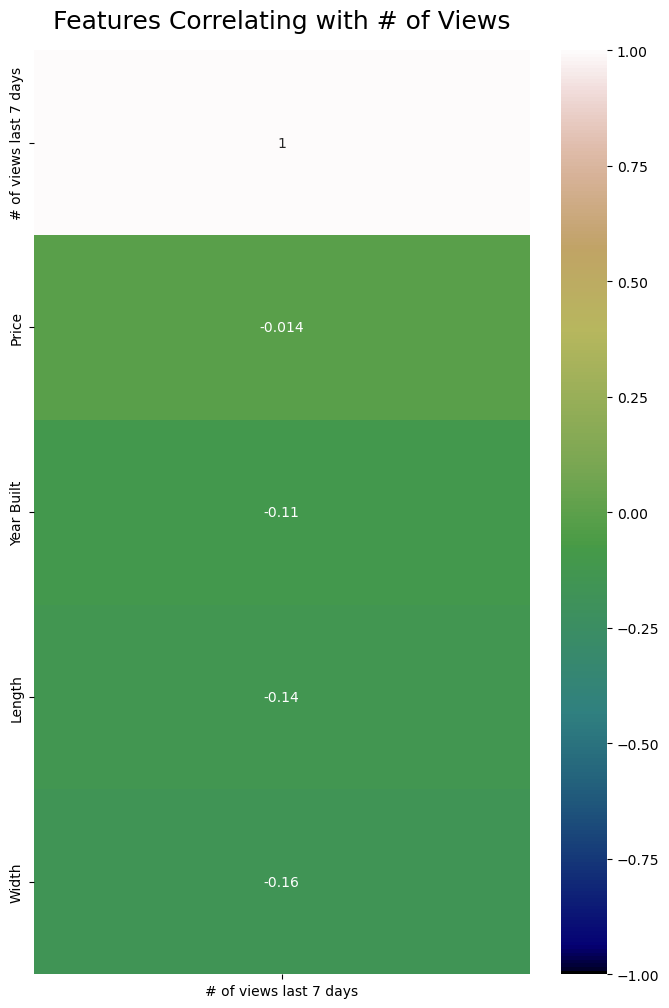

In [17]:
# Set fig size
plt.figure(figsize=(8, 12))

# Visualize the heatmap
feat_views = sns.heatmap(sub_df.corr()[['# of views last 7 days']].sort_values(by='# of views last 7 days', ascending=False), vmin=-1, vmax=1, annot=True, cmap='gist_earth')

# Set title
feat_views.set_title('Features Correlating with # of Views', fontdict={'fontsize':18}, pad=16);

# Save as png file
plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'boat_feat_corr_views.png'), dpi=300, bbox_inches='tight')

***notes:*** In descending order, the most influential features toward the number of views are the price, year built, length, and width. For example, the negative correlation between the year built and the number of views indicates that as the year built increases, the number of views tends to decrease slightly. This suggests that older boats are of greater interest in customer viewership.

---------------------------------------------------------------------------------------------------------------------------
- ***Create a scatterplot (or plots) for the variables with the strongest correlations***

<Figure size 1200x800 with 0 Axes>

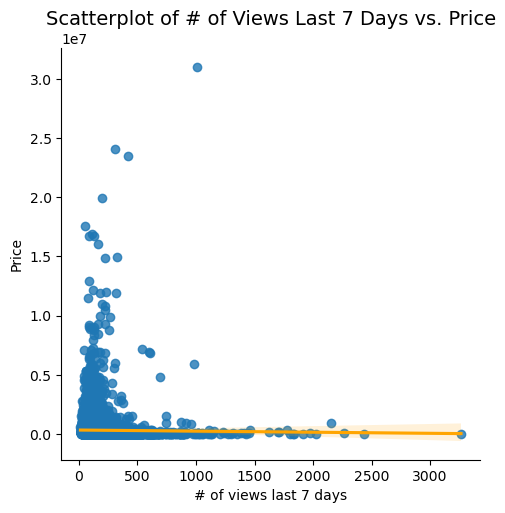

In [18]:
# Set the fig size
plt.figure(figsize=(12, 8))

# Use colormap
# If you want to use a colormap for the lmplot, you can specify the 'hue' parameter with a categorical variable.

# Create a scatterplot for the price and # of view variables
scatterplot = sns.lmplot(x='# of views last 7 days', y='Price', data=df, fit_reg=True, line_kws={"color": "orange"})

# Set the title
plt.title("Scatterplot of # of Views Last 7 Days vs. Price", fontsize=14)

# Save fig as png file
scatterplot.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatterplot_price_views.png'), dpi=300, bbox_inches='tight')

10. **Price and Number of Views Last 7 Days:**
    - The correlation coefficient between Price and Number of Views Last 7 Days is **-0.01.**
    - There is a **very weak negative correlation** between boat price and the number of views online in the last 7 days. The correlation is close to zero, suggesting that there is almost no linear relationship between these two variables.

<Figure size 1200x800 with 0 Axes>

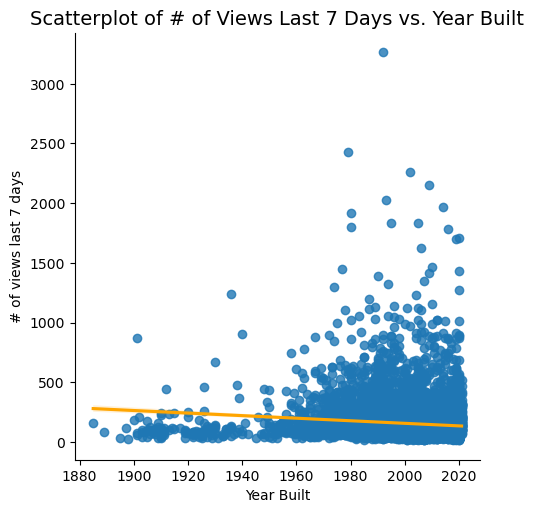

In [19]:
# Set the fig size
plt.figure(figsize=(12, 8))

# Use colormap
# If you want to use a colormap for the lmplot, you can specify the 'hue' parameter with a categorical variable.

# Create a scatterplot for the price and # of view variables
scatterplot = sns.lmplot(x = 'Year Built', y = '# of views last 7 days', data=df, fit_reg=True, line_kws={"color": "orange"})

# Set the title
plt.title("Scatterplot of # of Views Last 7 Days vs. Year Built", fontsize=14)

# Save fig as png file
scatterplot.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatterplot_year_views.png'), dpi=300, bbox_inches='tight')

4. **Year Built and Number of Views Last 7 Days:**
   - The correlation coefficient between Year Built and Number of Views Last 7 Days is **-0.11.**
   - A **weak negative correlation** exists between the year a boat was built and the number of views online in the last 7 days. As the year built increases, the number of views tends to decrease slightly.

---------------------------------------------------------------------------------------------------------------------------
- ***Create a pair plot of the entire data set***

<Figure size 1200x1600 with 0 Axes>

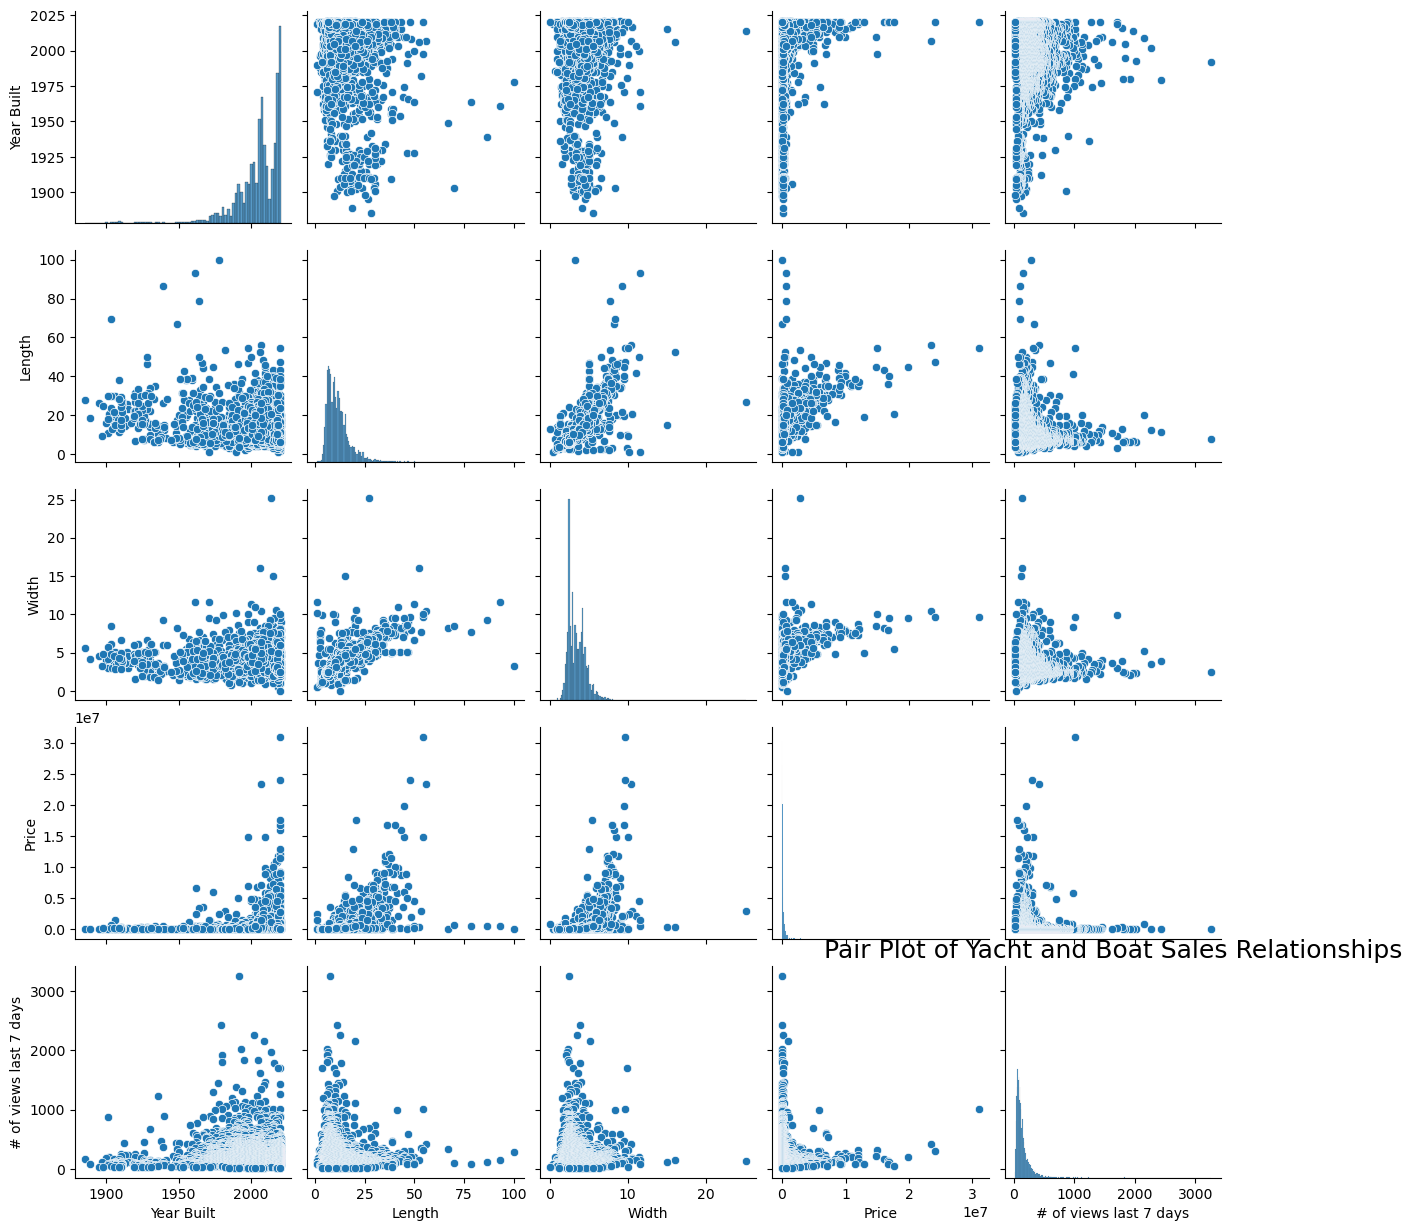

In [20]:
# Set the fig size
plt.figure(figsize=(12, 16))

# Create a pair plot from subset df, as the command only uses numerical variables regardless of subset or not.
pair_plot = sns.pairplot(sub_df)

# Set the title
plt.title("Pair Plot of Yacht and Boat Sales Relationships", fontsize=18)

# Save as png file
plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'boat_pair_plot.png'), dpi=300, bbox_inches='tight')

***notes:*** (price in millions)

As we can see from the pairplot visualization, we have many variables to compare relationships between. This can be used to further confirm patterns and trends in the data from their correlated coefficients.

---------------------------------------------------------------------------------------------------------------------------
- ***Create a categorical plot and interpret the result***

In [21]:
# View columns
df.columns

Index(['Boat Type', 'Manufacturer', 'Specifications', 'Year Built',
       'Year Built Condition', 'Length', 'Length Condition', 'Width',
       'Width Condition', 'Material', 'Price', 'Price Condition', 'Currency',
       'Country', 'State_Region', 'Location', '# of views last 7 days',
       'Views Condition'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

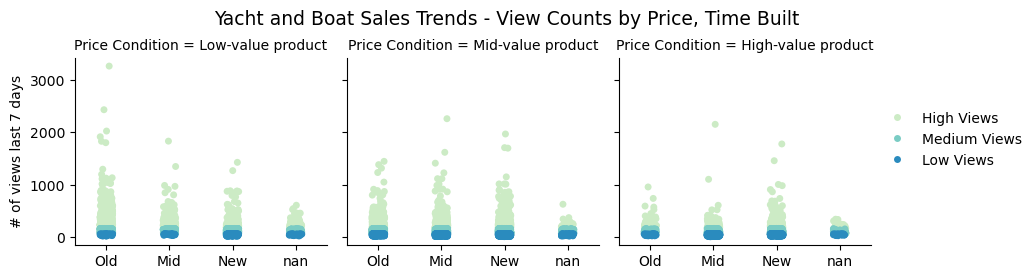

In [22]:
# Set the fig size
plt.figure(figsize=(10, 8))

# Create a categorical plot
catplot = sns.catplot(x="Year Built Condition", y="# of views last 7 days", data=df, hue="Views Condition", col='Price Condition', palette='GnBu', height=3)

# Set axis labels and plot title
plt.xlabel('')
plt.ylabel('# of views last 7 days')

# Set the title for the categorical plot
catplot.fig.suptitle("Yacht and Boat Sales Trends - View Counts by Price, Time Built", fontsize=13.5)

# Adjust layout to make room for the suptitle
plt.subplots_adjust(top=0.82)

# Remove x-axis labels
catplot.set_axis_labels(x_var="")

# Remove legend title
catplot._legend.set_title('')

# Save as png file
plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'boat_cat_plot.png'), dpi=300, bbox_inches='tight')

***notes:*** Older yachts year 2000 and older and boats priced at 44,000 or below received the most views in the last 7 days.

<Figure size 1000x800 with 0 Axes>

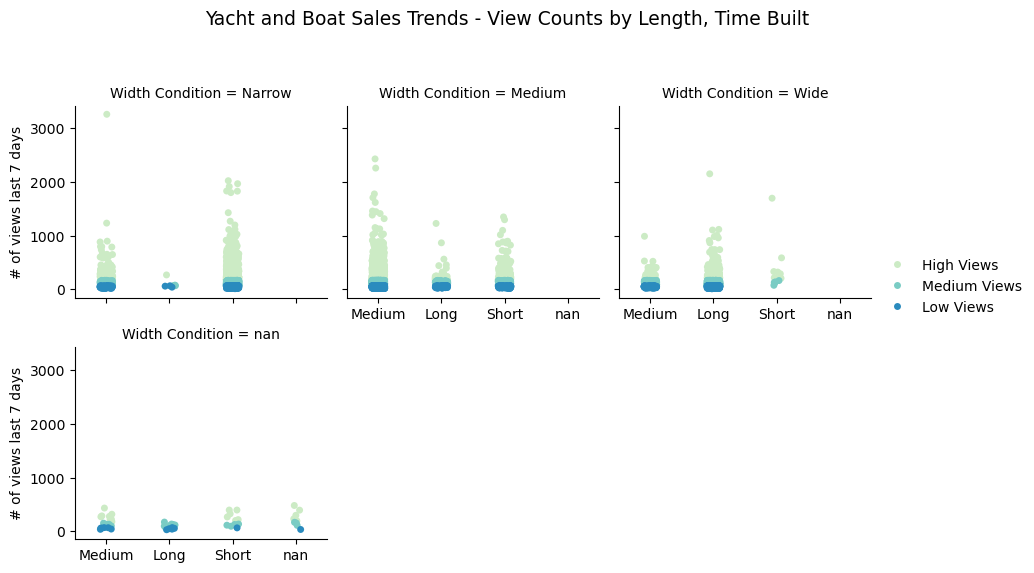

In [23]:
# Set the fig size
plt.figure(figsize=(10, 8))

# Create a categorical plot with NaN values excluded
catplot2 = sns.catplot(x="Length Condition", y="# of views last 7 days", data=df, hue="Views Condition", col='Width Condition', palette='GnBu', height=3, col_wrap=3)

# Filter out NaN values in the specific columns within the plot
catplot2.set(xticks=df['Length Condition'].dropna().unique())

# Set axis labels and plot title
plt.xlabel('')
plt.ylabel('# of views last 7 days')

# Set the title for the categorical plot
catplot2.fig.suptitle("Yacht and Boat Sales Trends - View Counts by Length, Time Built", fontsize=13.5)

# Adjust layout to make room for the suptitle
plt.subplots_adjust(top=0.82)

# Remove x-axis labels
catplot2.set_axis_labels(x_var="")

# Remove legend title
catplot2._legend.set_title('')

# Save as png file
plt.savefig(os.path.join(path, '03 Analysis','Visualizations', 'boat_cat_plot2.png'), dpi=300, bbox_inches='tight')

***notes:*** Short/Narrow and Medium/Medium yachts and boats recieved the most views in the last 7 days.

<Figure size 1000x800 with 0 Axes>

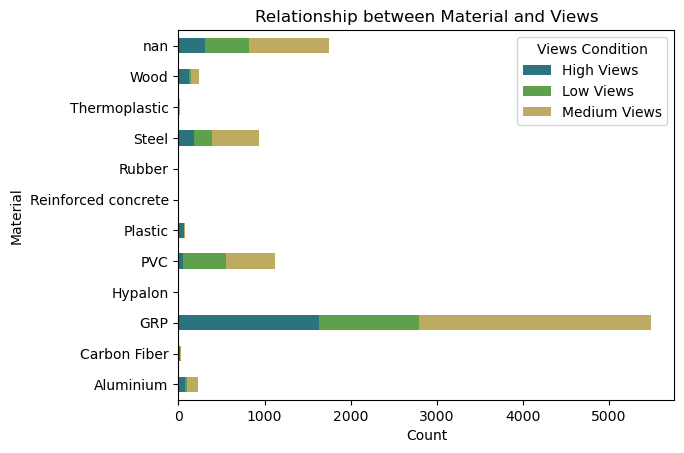

In [24]:
# Subset the dataframe with the categorical variables
cat_df = df[['Boat Type', 'Manufacturer', 'Specifications', 'Material', 'Country', 'Price Condition', 'Views Condition', 'Price', '# of views last 7 days']]

# Create a pivot table for the heatmap
pivot = cat_df.groupby(['Material', 'Views Condition']).size().unstack()

# Set the fig size
plt.figure(figsize=(10, 8))

# Create the bar chart using the custom colormap
# Use sns.color_palette to get a color palette and apply it to the bar chart
colors = sns.color_palette("gist_earth", n_colors=len(pivot.columns))
cat_bar = pivot.plot(kind='barh', stacked=True, color=colors)

# Set axis labels and plot title
plt.xlabel('Count')
plt.ylabel('Material')
plt.title('Relationship between Material and Views')

# Save the fig as png file
plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'material_cat_bar.png'), dpi=300, bbox_inches='tight')

***notes:*** Material: Glass Reinforced Plastic has the most viewership by count.

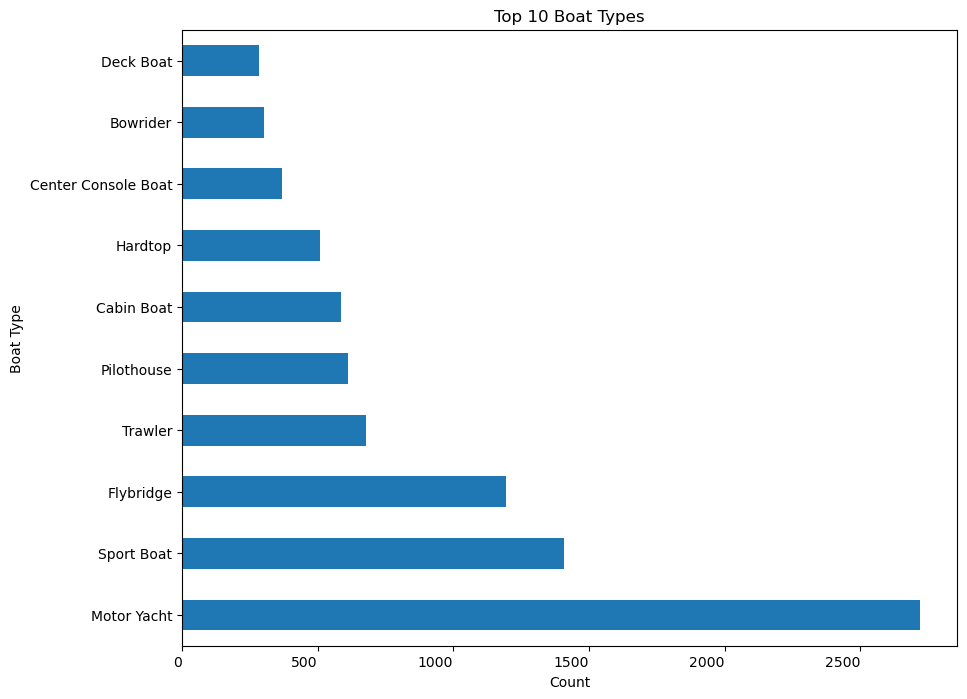

In [25]:
# Get the top 10 Boat Types
top_10_boat_types = df['Boat Type'].value_counts().nlargest(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bar_chart = top_10_boat_types.plot.barh()

# Set axis labels and plot title
plt.xlabel('Count')
plt.ylabel('Boat Type')
plt.title('Top 10 Boat Types')

# Rotate y-axis labels for better visibility
plt.xticks(rotation=0, ha='right')

# Save the fig as png file
plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'top_10_boat_types_bar.png'), dpi=300, bbox_inches='tight')

***notes:*** The Motor Yacht, Sport Boat, and Flybridg are the most common boat types on the Yacht and Boat Sales website.

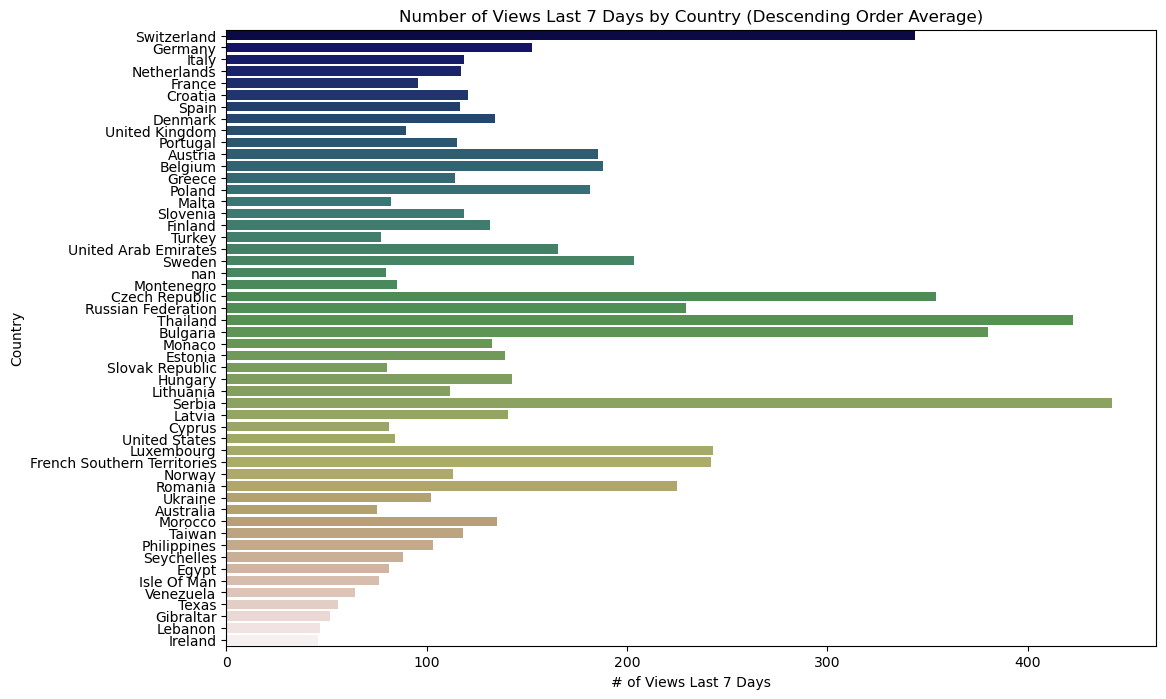

In [26]:
# Get the order of countries based on the number of views in the last 7 days
order = df.groupby('Country')['# of views last 7 days'].sum().sort_values(ascending=False).index

# Set the fig size
plt.figure(figsize=(12, 8))

# Create a bar chart with descending order and sum as the estimator
sns.barplot(x='# of views last 7 days', y='Country', data=df, ci=None, palette='gist_earth', order=order)

# Set axis labels and plot title
plt.xlabel('# of Views Last 7 Days')
plt.ylabel('Country')
plt.title('Number of Views Last 7 Days by Country (Descending Order Average)')

# Rotate x-axis labels for better visibility
#plt.xticks(rotation=45, ha='right')

# Save the fig as png file
plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'views_by_country_bar_descending.png'), dpi=300, bbox_inches='tight')

***notes:*** X-axis labels are in the correct descending order. Switzerland accounts for the highest total Yacht and Boat views on the website. Serbia may have the highest average views but this is because they only have one data entry, so the average views from serbia would be the same as their total average, indicating only 442 total views, compared to Switzerlands total 26,614 views.

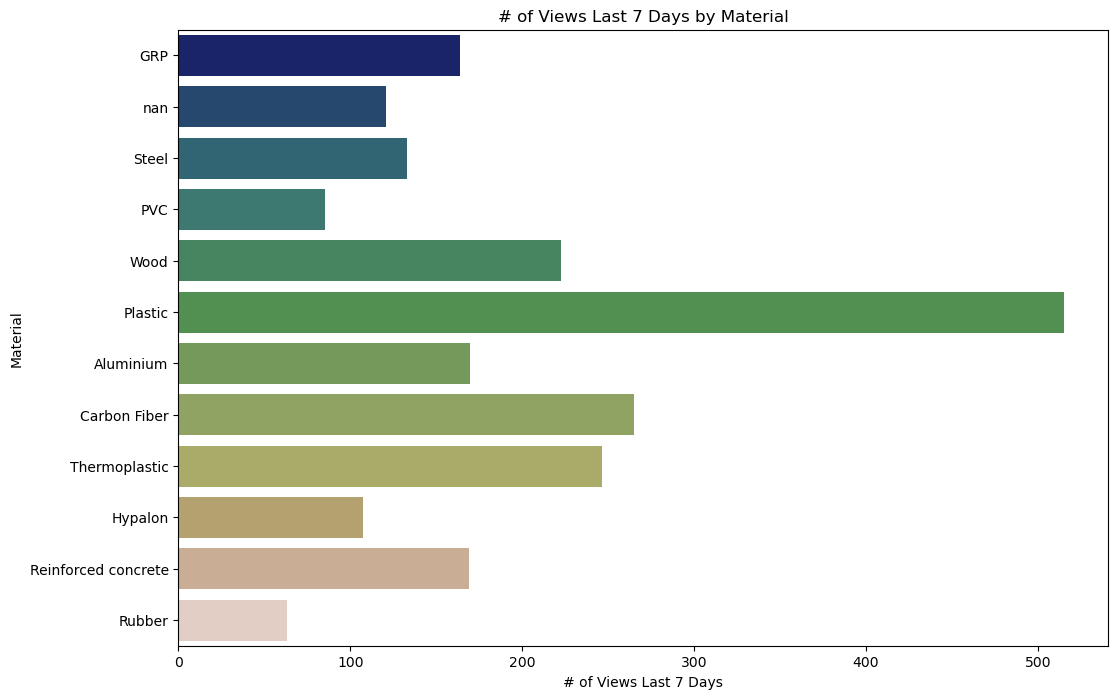

In [27]:
# Get the order of countries based on the number of views in the last 7 days
order = df.groupby('Material')['# of views last 7 days'].sum().sort_values(ascending=False).index

# Set the fig size
plt.figure(figsize=(12, 8))

# Create a bar chart with descending order and sum as the estimator
sns.barplot(x='# of views last 7 days', y='Material', data=df, ci=None, palette='gist_earth', order=order)

# Set axis labels and plot title
plt.xlabel('# of Views Last 7 Days')
plt.ylabel('Material')
plt.title('# of Views Last 7 Days by Material')

# Rotate x-axis labels for better visibility
#plt.xticks(rotation=45, ha='right')

# Save the fig as png file
plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'views_by_material_bar_descending.png'), dpi=300, bbox_inches='tight')

***notes:*** Plastic has the highest number of viewership but Glass Reinforced Plastic has the most viewership by total count in the dataset.

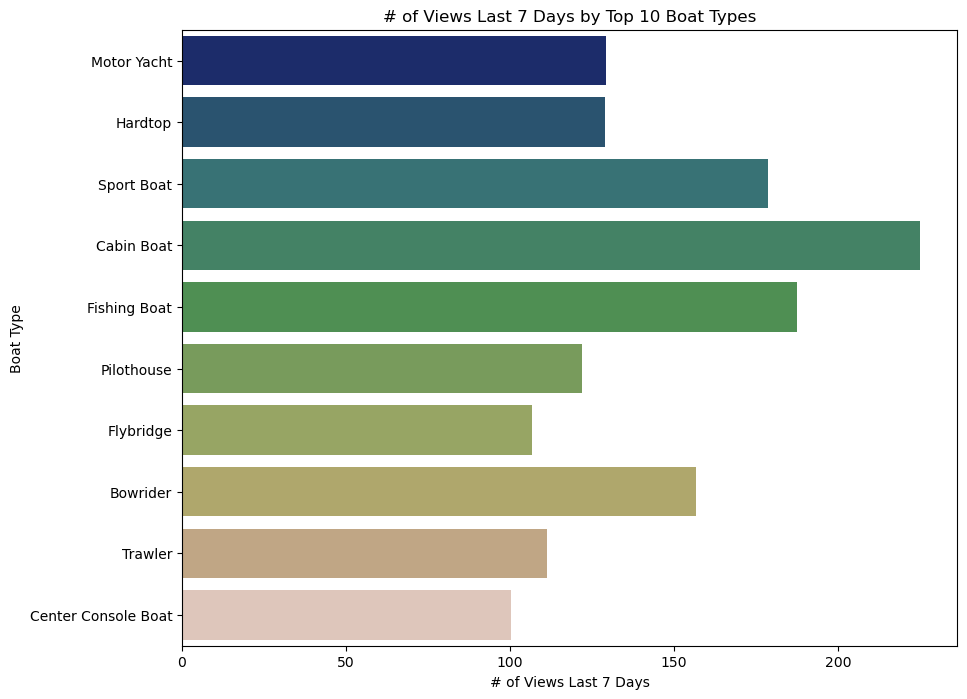

In [28]:
# Get the top 10 boat types based on the number of views in the last 7 days
top_10_boat_types = df.groupby('Boat Type')['# of views last 7 days'].sum().nlargest(10).index

# Subset the DataFrame for the top 10 boat types
df_top_10 = df[df['Boat Type'].isin(top_10_boat_types)]

# Set the fig size
plt.figure(figsize=(10, 8))

# Create a bar chart with descending order and sum as the estimator
sns.barplot(x='# of views last 7 days', y='Boat Type', data=df_top_10, ci=None, palette='gist_earth')

# Set axis labels and plot title
plt.xlabel('# of Views Last 7 Days')
plt.ylabel('Boat Type')
plt.title('# of Views Last 7 Days by Top 10 Boat Types')

# Save the fig as png file
plt.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'views_by_btype_bar_top10.png'), dpi=300, bbox_inches='tight')

***notes:*** The Cabin Boat type accounts for the highest views but the Motor Yacht, Hardtop, and Sport Boat account for more views by total frequency in the dataset.

---------------------------------------------------------------------------------------------------------------------------
### 4. Hypothesis

**Hypothesis 1 - Year Built and Views**
- *Null Hypothesis (H0):* The year in which a boat was built does not have a significant impact on the number of views it receives in the last 7 days.

- *Alternative Hypothesis (H1):* Boats with newer year-built conditions tend to receive higher views in the last 7 days compared to older boats.

**Hypothesis 2 - Price and Views**
- *Null Hypothesis (H0):* The price of a boat does not have a significant impact on the number of views it receives in the last 7 days.

- *Alternative Hypothesis (H1):* Boats with competitive pricing receive higher views in the last 7 days compared to boats with higher prices.

**Hypothesis 3 - Boat Type and Manufacturer Influence on Views**
- *Null Hypothesis (H0):* The combination of boat type and manufacturer does not significantly affect the number of views a boat receives in the last 7 days.

- *Alternative Hypothesis (H1):* Certain combinations of boat type and manufacturer result in significantly higher views in the last 7 days, indicating a market preference for specific types and manufacturers.

**Hypothesis 4 - Boat Material and Views**
- *Null Hypothesis (H0):* The material used in the construction of a boat does not have a significant impact on the number of views it receives in the last 7 days.

- *Alternative Hypothesis (H1):* Boats made from certain materials attract higher views in the last 7 days compared to boats made from other materials.

Notes:
- **Year Built Condition** Newer boats might attract more attention due to perceived innovation and modern features.
- **Price Condition** Boats with competitive pricing might attract a larger audience, influencing views.
- **Boat Type and Manufacturer** Certain types or manufacturers may have a stronger market presence, affecting the number of views.
- **Specifications** Unique specifications could be a key factor influencing the visibility of boats.
- **Material** The choice of material in boat construction might influence perceived quality, durability, and aesthetic appeal, which could impact the number of views.
    - Materials associated with modernity, innovation, or environmentally friendly practices might attract more attention.
    - Different materials may have different weights and maintenance requirements, influencing the preferences of potential       buyers and viewers.